AFL2 Data Mining (Nathanael Putra Agusalim - 0706022110040)

Import

In [9]:
import os
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import numpy as np

Data Cleaning

In [10]:
directory_path = 'C:/Users/Nathanael P.A/Desktop/Education/University/UC/DM-AFL2-Nathanael Putra Agusalim'
os.chdir(directory_path)

data = pd.read_csv("customer_analysis.csv", delimiter='\t', parse_dates=['Dt_Customer'], dayfirst=True)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
missing_values = data.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [12]:
income_mean = data["Income"].mean()
data["Income"].fillna(income_mean, inplace=True)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

Feature Engineering

In [13]:
current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']

data['Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

data['Living_With'] = data['Marital_Status'].replace({
    'Married': 'Spouse',
    'Together': 'Spouse',
    'Single': 'Alone',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Absurd': 'Unknown',
    'YOLO': 'Unknown'
})

data['Children'] = data['Kidhome'] + data['Teenhome']

data['Family_Size'] = 1 + data['Children']

data['Is_Parent'] = (data['Children'] > 0).astype(int)

data['Education_Category'] = data['Education'].replace({
    'PhD': 'Doctorate',
    'Master': 'Master',
    '2n Cycle': 'Bachelor',
    'Graduation': 'Bachelor',
    'Basic': 'Basic',
    'Unknown': 'Unknown'
})

data.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education'], inplace=True)

Data Preparation

In [14]:
label_encoder = LabelEncoder()
data['Education_Category'] = label_encoder.fit_transform(data['Education_Category'])
data['Living_With'] = label_encoder.fit_transform(data['Living_With'])

numerical_columns = ['Income', 'Recency', 'Spent', 'NumDealsPurchases', 'NumWebPurchases']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Clustering

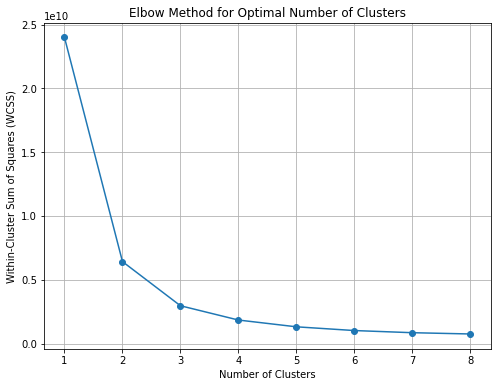

In [15]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_data = data[numerical_columns]
k_values = range(1, 9)
wcss_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(numerical_data)
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

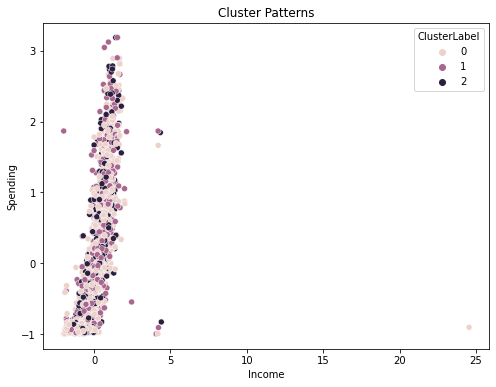

In [16]:
n_clusters = 3
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
data['ClusterLabel'] = agglomerative_clustering.fit_predict(numerical_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', hue='ClusterLabel', data=data)
plt.title("Cluster Patterns")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.show()

c:\Users\Nathanael P.A\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


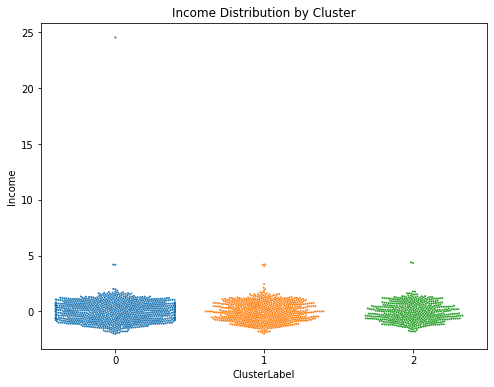

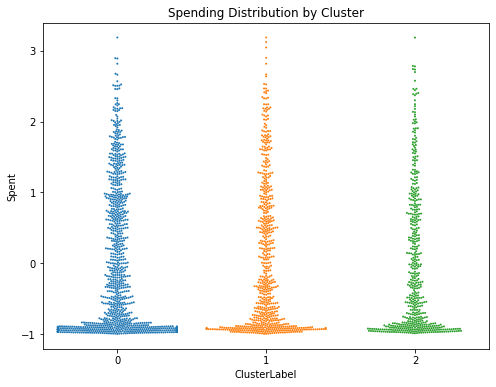

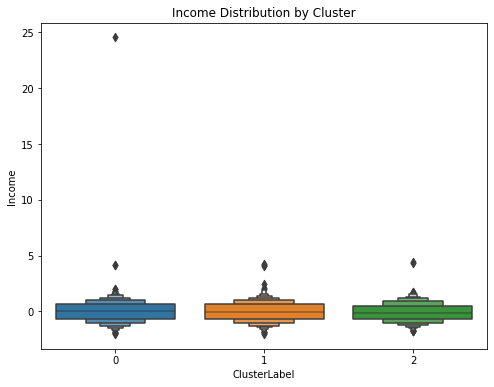

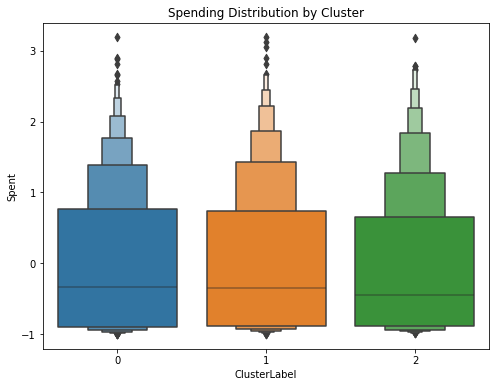

In [17]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='ClusterLabel', y='Income', data=data, size=2)
plt.title("Income Distribution by Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.swarmplot(x='ClusterLabel', y='Spent', data=data, size=2)
plt.title("Spending Distribution by Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxenplot(x='ClusterLabel', y='Income', data=data)
plt.title("Income Distribution by Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxenplot(x='ClusterLabel', y='Spent', data=data)
plt.title("Spending Distribution by Cluster")
plt.show()

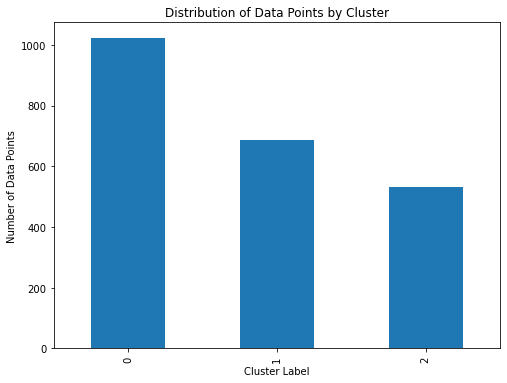

In [18]:
cluster_counts = data['ClusterLabel'].value_counts()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar')
plt.title("Distribution of Data Points by Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.show()